## **A. Introduction**

#### **A.1. Description & Disscusion of the Background**

London is one of the largest metropolises in the world where almost **9 million** people live and it has a population density of **5,701** people per square kilometer. As a resident of the city, I decided to use London in my project. The city is divided into 33 boroughs in total each controlled by a different political party which is often a good indicator for the affluence of the borough.

While London isn't the largest city or the most densely populated, it is extremely expensive and hard for any new business to prosper. It's not unusual for a small independent business to crop up one month and close down the next due to high rent and high competition. I aim to deliver insights into areas that business owners and investors should set up to avoid running themselves out of business. 

We would expect that cheaper areas would be more sought after for new business owners and more expensive areas for those already with a large brand behind them.

When we consider these things, we can create a map and information chart where the real estate index is placed on London and each district is clustered according to the venue density.

#### **A.2. Data Description**

To consider the problem we can list the data I collected below

* I used the Wikipedia page to list all London boroughs with their longitudes and latitudes and political sway 
* I used **Foursquare API** to get the most common venues of given Borough of London 
* I used a public csv file supplied by the London Datastore to find out the average weekly rent of each borough 

In [100]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import folium # map rendering library
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
conda install -c plotly plotly-orca

SyntaxError: invalid syntax (<ipython-input-100-7fbce2a54a71>, line 13)

## **B. Methodology**
----

#### **B.1. Creating data table and data pre-processing**

My master data **df** has the main components *Borough, Political control, Population, Area, Average weekly rent, Latitude* and *Longitude* informations of the city.

In [94]:
df = pd.read_csv("London_borough_df.csv")
df.head()

,Borough,Political control,Area (sq mi),Population (2019 est)[1],Rent,Longitude,Latitude
0,Barking and Dagenham,Labour,13.93,"212,906",95.516082,51.560,0.1557
1,Barnet,Conservative,33.49,"395,896",101.374365,51.625,-0.1517
2,Bexley,Conservative,23.38,"248,287",NaN,51.454,0.1505
3,Brent,Labour,16.70,"329,771",112.660721,51.558,-0.2817
4,Bromley,Conservative,57.97,"332,336",NaN,51.403,0.0198


Let's group the data by Political Control to help show affluent areas

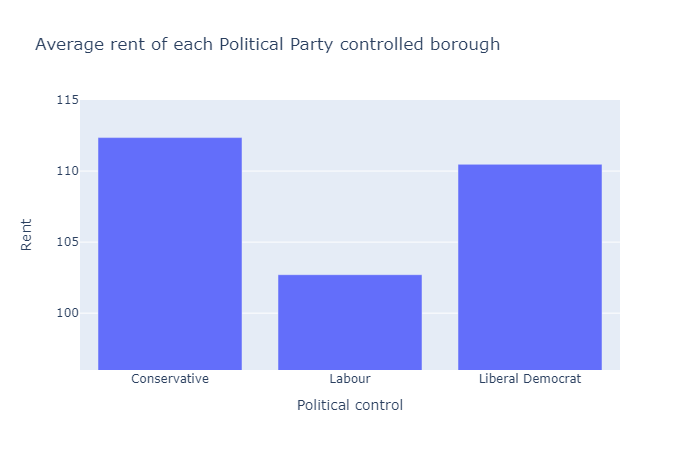

In [102]:
political_control = df.groupby('Political control', as_index=False)['Rent'].mean()
fig = px.bar(political_control, x="Political control", y="Rent", title='Average rent of each Political Party controlled borough') 
fig.update_layout(yaxis_range=[96,115])
fig.show("png")

As expected, Conservative controlled areas are typically more affluent leading to higher rent compared to Labour controlled areas.